#Tugas



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
NPM = 24083010089

In [5]:
makan = pd.read_csv("/content/makanan_Laudya.csv")

In [6]:
makan

,makanan,kenyang,sehat,rasa,bosan,harga
0,ayamgeprek,0.9,0.5,0.7,0.2,15000.0
1,nasipadang,1.0,0.8,0.9,0.5,17000.0
2,mieayam,1.0,0.6,0.9,0.3,10000.0
3,bakso,0.7,0.3,1.0,0.3,10000.0
4,cireng,0.5,0.4,0.8,0.7,10000.0
5,nasigoreng,0.8,0.7,1.0,0.5,14000.0
6,seblak,0.6,0.2,0.8,0.8,15000.0
7,gorengan,0.5,0.2,0.5,0.5,10000.0
8,capcay,0.6,0.9,0.8,0.4,15000.0
9,mi instan,0.5,0.1,0.7,0.2,4000.0


Prompt: pada bagian visualisasinya buatkan kode yang outputnya mudah dibaca dan jelas hasilnya

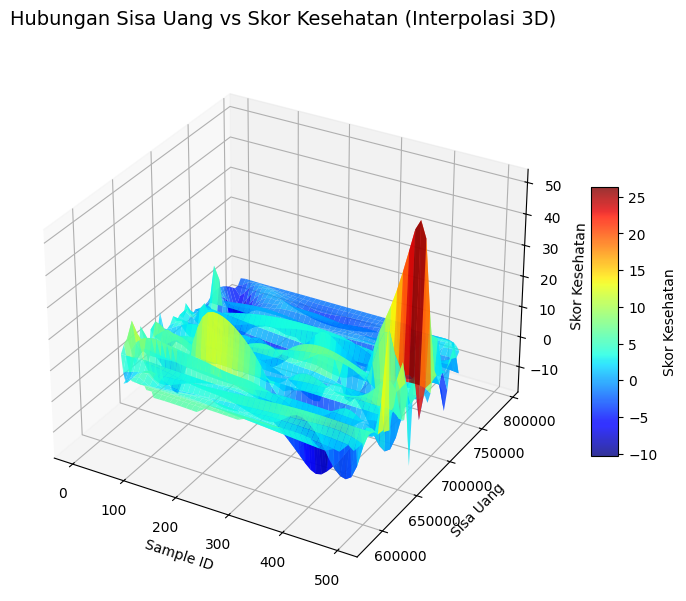

(1) Jumlah pola makan sehat: 417
(2) Pola makan sehat & sisa uang positif: 417
(3) Best sample index: 496
    Skor total: 82.35742095612494
    Skor sehat: 6.799999999999999
    Sisa uang : 620000.0

(4) Jadwal makanan terbaik:
Hari 01: Pagi = roti, Malam = miepangsit
Hari 02: Pagi = cireng, Malam = warteg
Hari 03: Pagi = bebek, Malam = nasi telur
Hari 04: Pagi = bebek, Malam = nasipadang
Hari 05: Pagi = roti, Malam = bakso
Hari 06: Pagi = mieayam, Malam = miepangsit
Hari 07: Pagi = mieayam, Malam = nasigoreng
Hari 08: Pagi = capcay, Malam = cireng
Hari 09: Pagi = mieayam, Malam = ayamgeprek
Hari 10: Pagi = nasipadang, Malam = capcay
Hari 11: Pagi = capcay, Malam = mieayam
Hari 12: Pagi = nasipadang, Malam = nasi telur
Hari 13: Pagi = penyetan, Malam = capcay
Hari 14: Pagi = soto, Malam = roti
Hari 15: Pagi = nasi telur, Malam = seblak
Hari 16: Pagi = miepangsit, Malam = seblak
Hari 17: Pagi = nasi telur, Malam = nasipadang
Hari 18: Pagi = nasipadang, Malam = capcay
Hari 19: Pagi = rot

In [13]:
budget_awal = 1500000

# Base weight factors
wkenyang_base = 0.9
wrasa_base    = 0.7
wsehat_base   = 0.5
wbosan_base   = 0.6

SAMPLE_NUM = 500
sampleid = np.arange(0, SAMPLE_NUM)

skor = np.zeros(SAMPLE_NUM, dtype=np.double)
sisa = np.zeros(SAMPLE_NUM, dtype=np.double)
sehat = np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM = 200000
SISA_MAKSIMUM = 400000
bin_sisa = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)

resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=np.double)  # 31 hari * 2 makan

# ==========================
# SIMULASI POLA MAKAN
# ==========================
for n in range(SAMPLE_NUM):
    budget = budget_awal
    skor_kumulatif = 0
    skor_sehat = 0

    for i in range(31):  # 31 hari

        # --- Makan Pagi ---
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa    = np.random.normal(loc=wrasa_base,    scale=0.2)
        w_sehat   = np.random.normal(loc=wsehat_base,   scale=0.4)
        w_bosan   = np.random.normal(loc=wbosan_base,   scale=0.2)

        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa  * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][2*i] = pilihan

        # --- Makan Malam ---
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa    = np.random.normal(loc=wrasa_base,    scale=0.2)
        w_sehat   = np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan   = np.random.normal(loc=wbosan_base*2, scale=0.2)

        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa  * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][2*i + 1] = pilihan

    # Simpan hasil akhir
    sisa[n] = budget
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    idx_sisa = int((budget - SISA_MININUM) / 1000)
    if 0 <= idx_sisa < len(bin_sisa):
        resp_sehat[n][idx_sisa] = skor_sehat

# ==========================
# VISUALISASI RESPON KESEHATAN
# ==========================
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

xi = np.linspace(min(sampleid), max(sampleid), 50)
yi = np.linspace(min(sisa), max(sisa), 50)
XI, YI = np.meshgrid(xi, yi)

ZI = griddata((sampleid, sisa), sehat, (XI, YI), method='cubic')

# Plot permukaan 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(XI, YI, ZI, cmap='jet', edgecolor='none', alpha=0.8)

ax.set_title("Hubungan Sisa Uang vs Skor Kesehatan (Interpolasi 3D)", fontsize=14, pad=20)
ax.set_xlabel("Sample ID")
ax.set_ylabel("Sisa Uang")
ax.set_zlabel("Skor Kesehatan")

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label="Skor Kesehatan")
plt.show()


#TUgasssssssss
# (1) pola makan dengan skor sehat positif
idx_sehat = np.where(sehat > 0)[0]
print("(1) Jumlah pola makan sehat:", len(idx_sehat))

# (2) dari (1) yang sisa uang positif
idx_sehat_sisa = idx_sehat[sisa[idx_sehat] > 0]
print("(2) Pola makan sehat & sisa uang positif:", len(idx_sehat_sisa))

# (3) titik dengan skor kumulatif terbesar
if len(idx_sehat) > 0:
    kandidat = idx_sehat_sisa if len(idx_sehat_sisa) > 0 else idx_sehat
    best_idx = kandidat[np.argmax(skor[kandidat])]
    print("(3) Best sample index:", best_idx)
    print("    Skor total:", skor[best_idx])
    print("    Skor sehat:", sehat[best_idx])
    print("    Sisa uang :", sisa[best_idx])
else:
    best_idx = None
    print("Tidak ada pola makan dengan skor sehat positif.")

# (4) tampilkan jadwal makan
if best_idx is not None:
    print("\n(4) Jadwal makanan terbaik:")
    jadwal_idx = resp_pilih[best_idx].astype(int)
    for hari in range(31):
        pagi = makan['makanan'][jadwal_idx[2*hari]]
        malam = makan['makanan'][jadwal_idx[2*hari+1]]
        print(f"Hari {hari+1:02d}: Pagi = {pagi}, Malam = {malam}")

Prompt:jelaskan apa saja yang dapat kita ketahui dari output tersebut mengenai pola makanan sehat dan sisa uang bulanan

1. Jumlah pola makan sehat

Dari 500 sampel simulasi, ada 417 pola makan dengan skor sehat positif.

Artinya, mayoritas orang masih bisa menjaga pola makan yang relatif sehat walaupun pilihan makanan acak setiap hari.

2. Pola makan sehat & sisa uang positif

Dari 417 pola makan sehat tadi, semuanya juga masih punya sisa uang positif.

Ini menunjukkan bahwa budget Rp 1.500.000/bulan cukup aman untuk pola makan sehari-hari mahasiswa, bahkan masih tersisa (≈ Rp 600–700 ribu).

3. Pola makan terbaik (Best Sample Index: 496)

Skor total: 82.36 → mencerminkan gabungan skor kesehatan dan efisiensi keuangan.

Skor sehat: 6.8 → menunjukkan bahwa individu ini memiliki pola makan yang sangat sehat (mendekati maksimum).

Sisa uang: 620.000 → artinya setelah semua pengeluaran, mahasiswa ini masih memiliki uang saku tersisa sebesar 620 ribu rupiah.

Fenomenanya: pola makan terbaik seimbang antara gizi dan keuangan, tidak “diet hemat ekstrem” atau “boros tidak sehat”.

4. Jadwal makanan terbaik

Kalau kita lihat daftar 31 hari:

Makanan sering muncul berulang → nasi padang, mie ayam, mie pangsit, soto, bakso.
→ menandakan makanan-makanan ini cukup sering terpilih karena punya kombinasi harga terjangkau + skor kenyang/rasa tinggi.


Dan penjelasan untuk interpolasi hubungan antara Sisa Uang, Skor Kesehatan, dan Sample ID.

Grafik ini menggambarkan korelasi antara tiga variabel utama:

Sumbu X (Sample ID): urutan sampel atau percobaan (setiap kombinasi jadwal makan yang diuji).

Sumbu Y (Sisa Uang): jumlah uang yang tersisa setelah membeli makanan selama satu periode.

Sumbu Z (Skor Kesehatan): tingkat kesehatan pola makan yang dihasilkan oleh jadwal tersebut.

Warna pada permukaan (biru–kuning–merah) menunjukkan nilai Skor Kesehatan, di mana:

🔵 Biru = skor rendah (pola makan kurang sehat),

🟡–🟠-🟢 Sedang = keseimbangan antara pengeluaran dan gizi,

🔴 Merah = skor tinggi (pola makan paling sehat).




#visualisasi


Prompt : untuk data yang saya berikan,visualisasi apa saja yang cocok dan menggambarkan data pola makan

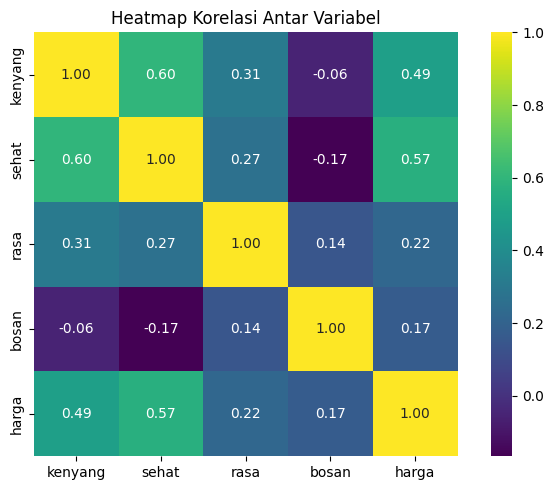

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

if 'Skor Kategori' in makan.columns:
    df_corr = makan.drop('Skor Kategori', axis=1)
else:
    df_corr = makan.copy()

# Ambil hanya kolom numerik supaya corr() tidak error
df_corr = df_corr.select_dtypes(include=['number'])

# Plot heatmap korelasi
plt.figure(figsize=(7, 5))
sns.heatmap(df_corr.corr(), annot=True, cmap="viridis", fmt=".2f", square=True)
plt.title("Heatmap Korelasi Antar Variabel")
plt.tight_layout()
plt.show()

Pasangan Variabel = Nilai Korelasi = Makna Hubungan

Kenyang vs Sehat (0.60)
→ Artinya semakin kenyang seseorang setelah makan, cenderung semakin sehat pula makanannya.

Rasa vs Sehat (0.27)
→ Makanan sehat sedikit berkorelasi positif dengan rasa, tapi tidak kuat.
Artinya, tidak semua makanan sehat terasa enak bagi responden.

Bosan vs Sehat (-0.17)
→ Korelasi negatif lemah: semakin sehat makanan, sedikit lebih mungkin membuat bosan.

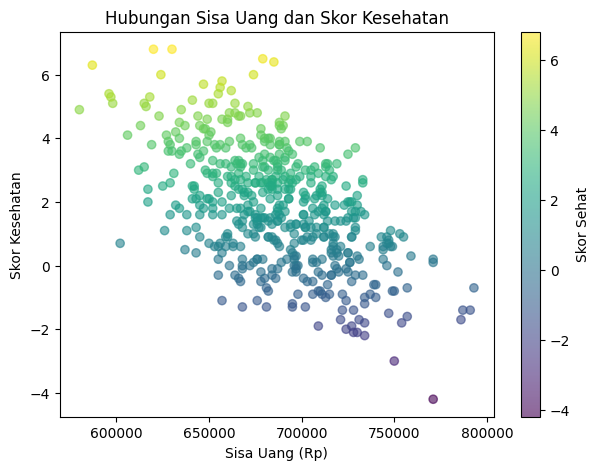

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(sisa, sehat, alpha=0.6, c=sehat, cmap="viridis")
plt.colorbar(label="Skor Sehat")
plt.xlabel("Sisa Uang (Rp)")
plt.ylabel("Skor Kesehatan")
plt.title("Hubungan Sisa Uang dan Skor Kesehatan")
plt.show()

Scatter plot ini menunjukkan hubungan antara sisa uang (Rp) di sumbu-X dan skor kesehatan di sumbu-Y.

Terlihat ada pola menurun: semakin tinggi skor kesehatan, sisa uang cenderung lebih sedikit.

Ini menunjukkan hubungan negatif antara kedua variabel tersebut.
Artinya, untuk mencapai pola makan yang lebih sehat, seseorang biasanya harus mengeluarkan lebih banyak uang.

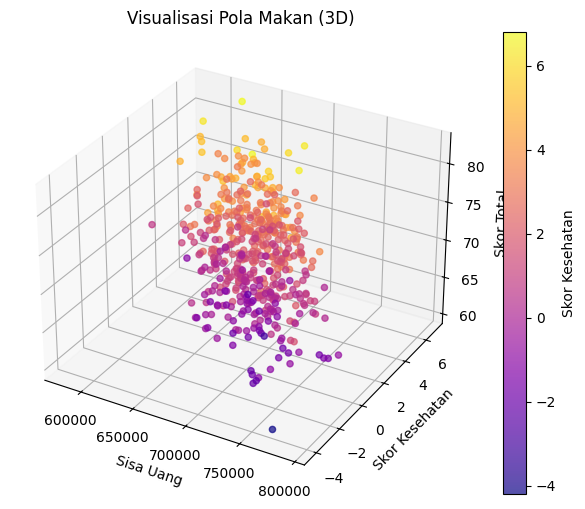

In [17]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(sisa, sehat, skor, c=sehat, cmap="plasma", alpha=0.7)

ax.set_xlabel("Sisa Uang")
ax.set_ylabel("Skor Kesehatan")
ax.set_zlabel("Skor Total")
ax.set_title("Visualisasi Pola Makan (3D)")
fig.colorbar(sc, ax=ax, label="Skor Kesehatan")
plt.show()

Sumbu X → Sisa Uang (Rp): menunjukkan berapa banyak uang yang tersisa setelah kebutuhan makanan selama periode tertentu.

Sumbu Y → Skor Kesehatan: menggambarkan seberapa sehat pilihan makanan (misalnya tinggi jika banyak sayur dan rendah gorengan).

Sumbu Z → Skor Total: skor gabungan antara keseimbangan uang dan kesehatan — semakin tinggi berarti semakin optimal.

Warna titik → Skor Kesehatan (colorbar di kanan): dari ungu (tidak sehat) ke kuning (sangat sehat).

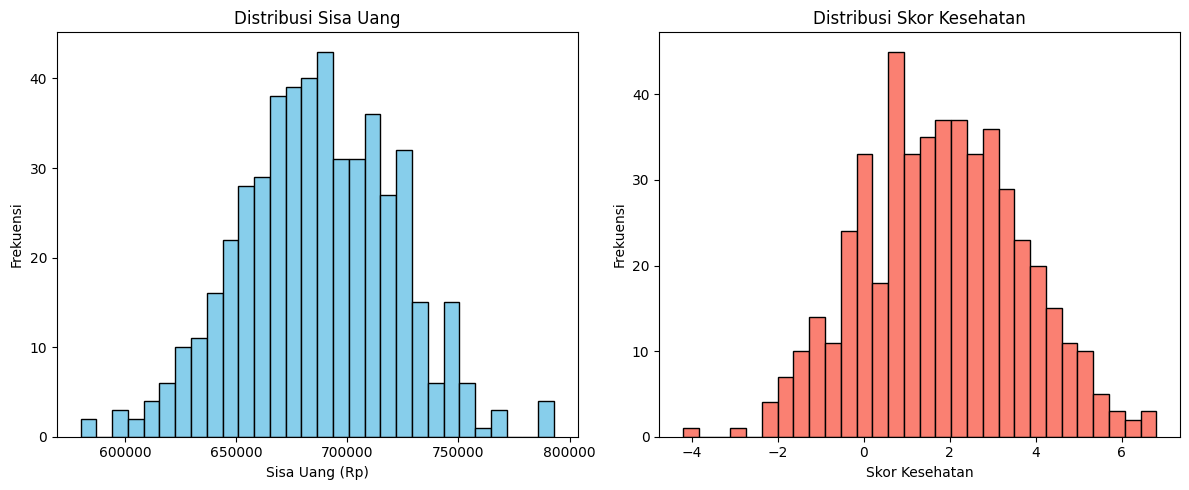

In [18]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(sisa, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Sisa Uang (Rp)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Sisa Uang")

plt.subplot(1,2,2)
plt.hist(sehat, bins=30, color="salmon", edgecolor="black")
plt.xlabel("Skor Kesehatan")
plt.ylabel("Frekuensi")
plt.title("Distribusi Skor Kesehatan")

plt.tight_layout()
plt.show()


(a) Distribusi Sisa Uang (kiri)

Sumbu X menunjukkan jumlah sisa uang (Rp), sedangkan sumbu Y menunjukkan frekuensi atau jumlah sampel.

Bentuknya menyerupai distribusi normal (lonceng) — artinya sebagian besar responden memiliki sisa uang di sekitar Rp 670.000–710.000.

Ada sedikit data di ujung kiri dan kanan (ekor distribusi), yang berarti hanya sedikit orang yang sisa uangnya sangat kecil atau sangat besar

(b) Distribusi Skor Kesehatan (kanan)

Sumbu X menunjukkan skor kesehatan (kemungkinan hasil dari beberapa indikator gaya hidup atau pola makan).

Polanya juga mirip distribusi normal, dengan puncak di sekitar nilai 1–3.

Ini menunjukkan bahwa mayoritas responden memiliki skor kesehatan rata-rata hingga baik, dan hanya sedikit yang ekstrem (terlalu rendah atau terlalu tinggi).

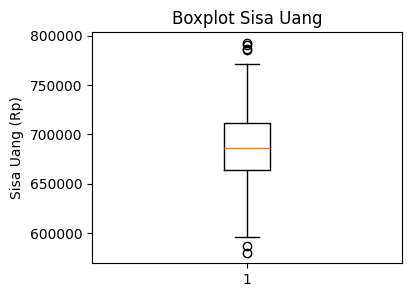

In [20]:
plt.figure(figsize=(4, 3))
plt.boxplot(sisa)
plt.ylabel("Sisa Uang (Rp)")
plt.title("Boxplot Sisa Uang")
plt.show()

Kotak (box) menunjukkan rentang interkuartil (IQR), yaitu jarak antara kuartil bawah (Q1) dan kuartil atas (Q3).
→ Di sinilah 50% data berada.

Garis di tengah box (warna oranye) adalah median, menunjukkan nilai tengah sisa uang.
→ Jadi sekitar separuh responden punya sisa uang di atas garis ini, dan separuhnya di bawah.

Titik di luar whiskers (lingkaran kecil) adalah outlier, yaitu individu dengan sisa uang jauh lebih tinggi atau lebih rendah dibanding rata-rata umum.

/tmp/ipython-input-2508684356.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sisa, shade=True, color="skyblue")
/tmp/ipython-input-2508684356.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sehat, shade=True, color="salmon")


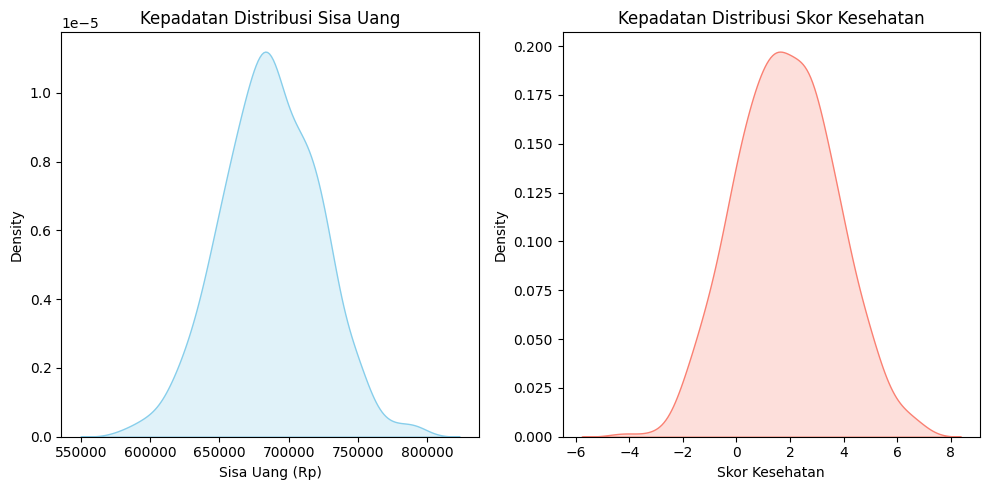

In [22]:
plt.figure(figsize=(10,5))

# Sisa Uang
plt.subplot(1,2,1)
sns.kdeplot(sisa, shade=True, color="skyblue")
plt.title("Kepadatan Distribusi Sisa Uang")
plt.xlabel("Sisa Uang (Rp)")

# Skor Kesehatan
plt.subplot(1,2,2)
sns.kdeplot(sehat, shade=True, color="salmon")
plt.title("Kepadatan Distribusi Skor Kesehatan")
plt.xlabel("Skor Kesehatan")

plt.tight_layout()
plt.show()